In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

url = "https://raw.githubusercontent.com/Ishrat24/Data-Analytics/main/Logistic%20Regression/HDMA.csv"

In [88]:
df = pd.read_csv(url)

In [89]:
df

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221000,0.221000,0.800000,5.000000,2.000000,no,no,no,no,3.900000,0,no,no
1,2,0.265000,0.265000,0.921875,2.000000,2.000000,no,no,no,yes,3.200000,0,no,no
2,3,0.372000,0.248000,0.920398,1.000000,2.000000,no,no,no,no,3.200000,0,no,no
3,4,0.320000,0.250000,0.860465,1.000000,2.000000,no,no,no,no,4.300000,0,no,no
4,5,0.360000,0.350000,0.600000,1.000000,1.000000,no,no,no,no,3.200000,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2377,0.300000,0.300000,0.777049,1.000000,2.000000,no,no,no,yes,3.200000,1,no,no
2377,2378,0.260000,0.200000,0.526761,2.000000,1.000000,no,no,no,no,3.100000,0,no,no
2378,2379,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,1,yes,yes
2379,2380,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,1,no,yes


In [90]:
df.rename( columns={'Unnamed: 0':'a'}, inplace=True )

In [91]:
df

,a,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221000,0.221000,0.800000,5.000000,2.000000,no,no,no,no,3.900000,0,no,no
1,2,0.265000,0.265000,0.921875,2.000000,2.000000,no,no,no,yes,3.200000,0,no,no
2,3,0.372000,0.248000,0.920398,1.000000,2.000000,no,no,no,no,3.200000,0,no,no
3,4,0.320000,0.250000,0.860465,1.000000,2.000000,no,no,no,no,4.300000,0,no,no
4,5,0.360000,0.350000,0.600000,1.000000,1.000000,no,no,no,no,3.200000,0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2377,0.300000,0.300000,0.777049,1.000000,2.000000,no,no,no,yes,3.200000,1,no,no
2377,2378,0.260000,0.200000,0.526761,2.000000,1.000000,no,no,no,no,3.100000,0,no,no
2378,2379,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,1,yes,yes
2379,2380,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,1,no,yes


In [92]:
#Dropped unwanted columns

df.drop("a",axis=1, inplace = True)

# EDA

<!-- Attribute Information :

dir     :  debt payments to total income ratio

hir     :  housing expenses to income ratio

lvr     :  ratio of size of loan to assessed value of property

ccs     :  consumer credit score from 1 to 6 (a low value being a good score)

mcs     :  mortgage credit score from 1 to 4 (a low value being a good score)

pbcr    :  public bad credit record ?

dmi     :  denied mortgage insurance ?

self    :  self employed ?

single  :  is the applicant single ?

uria    :  1989 Massachusetts unemployment rate in the applicant's industry

condominium  : is unit a condominium ? (was called comdominiom in version 0.2-9 and earlier versions of the package)

black   :  is the applicant black ?

deny    :  mortgage application denied ? -->

In [93]:
# dir -- debt payment to total income ratio
# hir -- house expense to income ratio
# lvr -- ratio of size of loan to assessed value of property
# ccs -- consumer credit score from 1 to 6 (a low value being a good score)
# mcs -- mortgage credit score from 1 to 4 (a low value being a good score)
# pbcr -- public bad credit score
# dmi -- denied mortagage insurance
# self -- self employed
# single -- is the applicant single
# uria -- 1989 Massachusetts unemployment rate in the applicant's industry
# condominium -- is unit a condominium
# black -- is the applicant black
# deny -- mortgage application denied

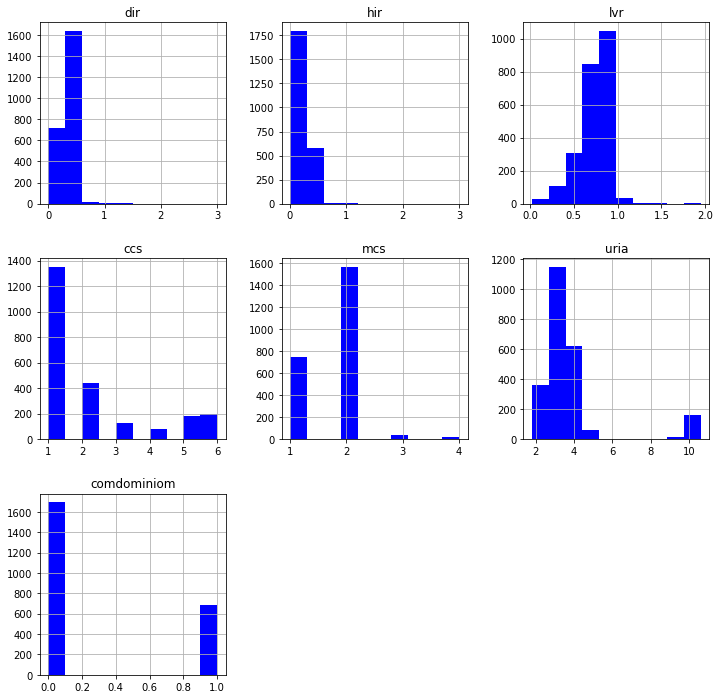

In [94]:
#Histogram of numerical data
fig = df.hist(figsize=(12,12),color ='blue')


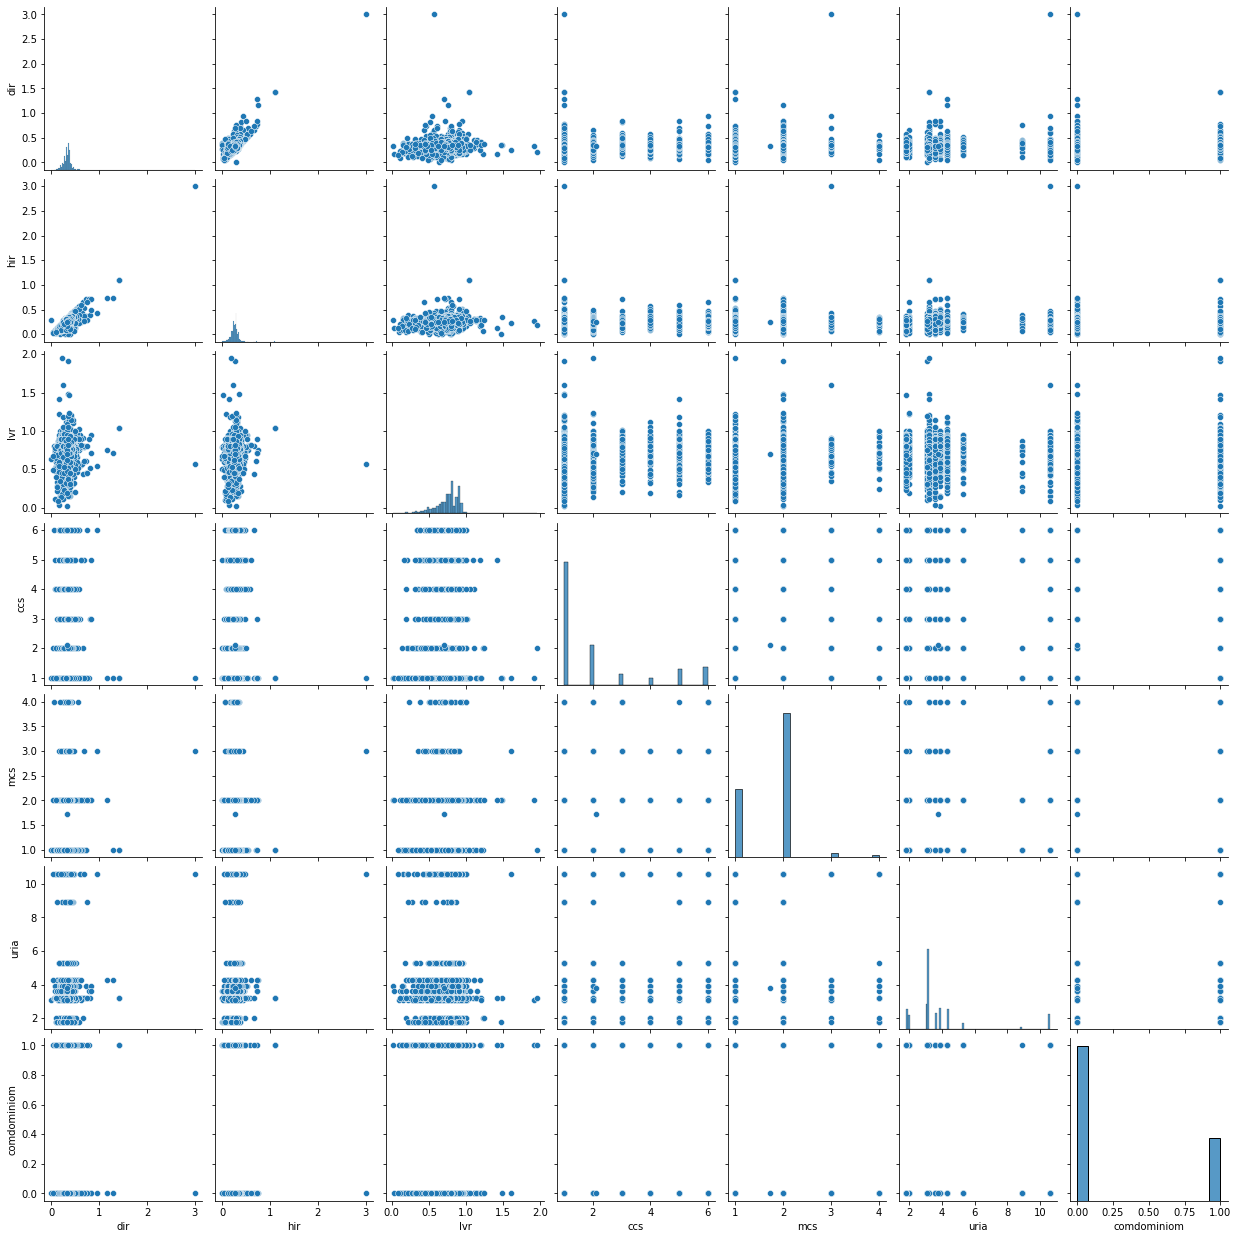

In [95]:
sns.pairplot(df)

In [96]:
df.corr().sort_values('dir', ascending=False)

,dir,hir,lvr,ccs,mcs,uria,comdominiom
dir,1.000000,0.781473,0.150653,0.065234,0.051318,0.046450,-0.012451
hir,0.781473,1.000000,0.126273,0.005277,0.104721,0.036992,-0.046039
lvr,0.150653,0.126273,1.000000,0.111939,0.186326,-0.034643,0.055001
ccs,0.065234,0.005277,0.111939,1.000000,0.152686,-0.006424,0.050742
mcs,0.051318,0.104721,0.186326,0.152686,1.000000,0.037077,0.090462
uria,0.046450,0.036992,-0.034643,-0.006424,0.037077,1.000000,-0.100647
comdominiom,-0.012451,-0.046039,0.055001,0.050742,0.090462,-0.100647,1.000000


In [97]:
df.dtypes

dir            float64
hir            float64
lvr            float64
ccs            float64
mcs            float64
pbcr            object
dmi             object
self            object
single          object
uria           float64
comdominiom      int64
black           object
deny            object
dtype: object

In [98]:
df.isnull().sum()

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

Here we can see there are some null value present in this table and those column names are pbcr and self

In [99]:
#Detecting Nan values

nan_values = df[df.columns[df.isnull().any()]]

print (nan_values)


     pbcr self
0      no   no
1      no   no
2      no   no
3      no   no
4      no   no
...   ...  ...
2376   no   no
2377   no   no
2378  yes   no
2379   no   no
2380  NaN  NaN

[2381 rows x 2 columns]


In [100]:
# # filling a missing value with
# df['pbcr'] = df['pbcr'].str.replace('NaN', '').astype("float")


# df['self'] = df['self'].str.replace('NaN', '').astype("float")



In [101]:
# df['normalized_losses'].replace('?', np.nan , inplace=True)
# df['normalized_losses'] = cars['normalized_losses'].astype("float")
# df['normalized_losses'].fillna(cars["normalized_losses"].mean(),inplace = True)


In [102]:
df.isnull().sum()

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dir          2381 non-null   float64
 1   hir          2381 non-null   float64
 2   lvr          2381 non-null   float64
 3   ccs          2381 non-null   float64
 4   mcs          2381 non-null   float64
 5   pbcr         2380 non-null   object 
 6   dmi          2381 non-null   object 
 7   self         2380 non-null   object 
 8   single       2381 non-null   object 
 9   uria         2381 non-null   float64
 10  comdominiom  2381 non-null   int64  
 11  black        2381 non-null   object 
 12  deny         2381 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 241.9+ KB


In [104]:
df.dtypes

dir            float64
hir            float64
lvr            float64
ccs            float64
mcs            float64
pbcr            object
dmi             object
self            object
single          object
uria           float64
comdominiom      int64
black           object
deny            object
dtype: object

Text(0, 0.5, 'Debt payments to total income ratio')

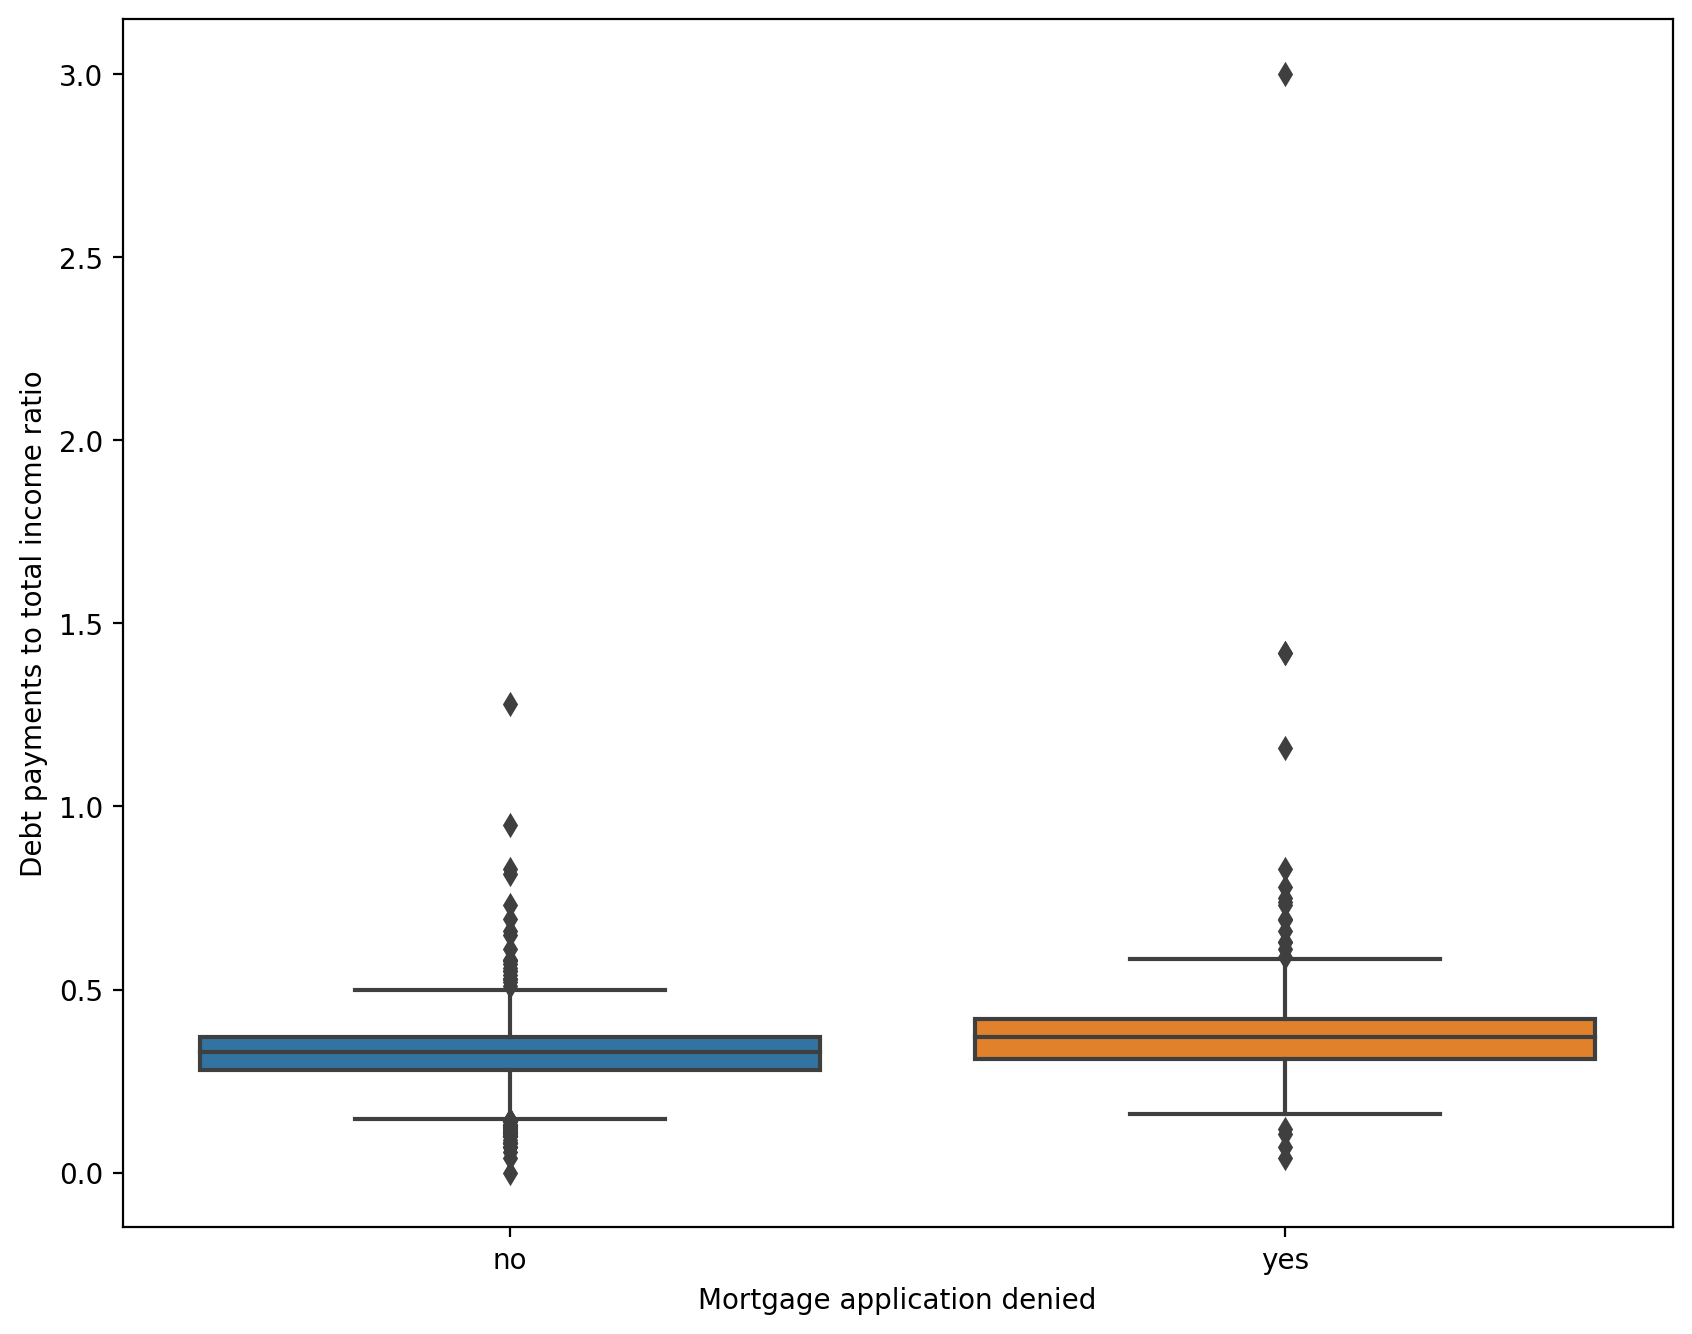

In [105]:
#Higher the debt, the more chance to get mortgage application denied

plt.figure(figsize=(10,8), dpi=200)
ax1 = sns.boxplot(data = df , x = 'deny' , y = 'dir')
ax1.set_xlabel('Mortgage application denied')
ax1.set_ylabel('Debt payments to total income ratio')

In [106]:
df[(df['deny'] =="no") & (df['dir'] >= 0.5)].index.values

array([ 323,  411,  459,  492,  559,  571,  607,  608,  788,  888, 1036,
       1104, 1278, 1320, 1389, 1391, 1398, 1403, 1441, 1466, 1594, 1737,
       1751, 1777], dtype=int64)

In [107]:
df.drop([323,  411,  459,  492,  559,  571,  607,  608,  788,  888, 1036,
       1104, 1278, 1320, 1389, 1391, 1398, 1403, 1441, 1466, 1594, 1737,
       1751, 1777],inplace = True)

In [108]:
df[(df['deny'] =="yes") & (df['dir'] <= 0.5)].index.values

array([   8,   12,   20,   42,   43,   46,   48,   78,   82,   83,   86,
         90,  105,  113,  118,  126,  128,  156,  159,  176,  177,  190,
        191,  193,  194,  216,  237,  240,  275,  278,  317,  318,  319,
        326,  327,  350,  362,  368,  369,  370,  372,  375,  389,  402,
        410,  417,  420,  445,  446,  462,  464,  487,  489,  499,  509,
        523,  526,  529,  530,  549,  552,  554,  562,  563,  579,  583,
        586,  594,  640,  641,  672,  679,  680,  701,  702,  705,  722,
        740,  793,  794,  796,  797,  798,  799,  801,  802,  805,  807,
        808,  809,  810,  811,  812,  813,  814,  815,  816,  817,  818,
        820,  822,  823,  825,  843,  874,  955,  983, 1008, 1009, 1020,
       1022, 1024, 1025, 1026, 1055, 1064, 1068, 1077, 1097, 1115, 1162,
       1168, 1179, 1187, 1197, 1198, 1199, 1203, 1205, 1231, 1233, 1263,
       1272, 1282, 1283, 1295, 1304, 1305, 1370, 1380, 1384, 1386, 1394,
       1407, 1422, 1424, 1428, 1452, 1460, 1464, 15

In [109]:
df.drop([8,   12,   20,   42,   43,   46,   48,   78,   82,   83,   86, 90,  105,  113,  118,  126,  128,  156,  159,  176,  177,  190],inplace = True)

Text(0, 0.5, 'Debt payments to total income ratio')

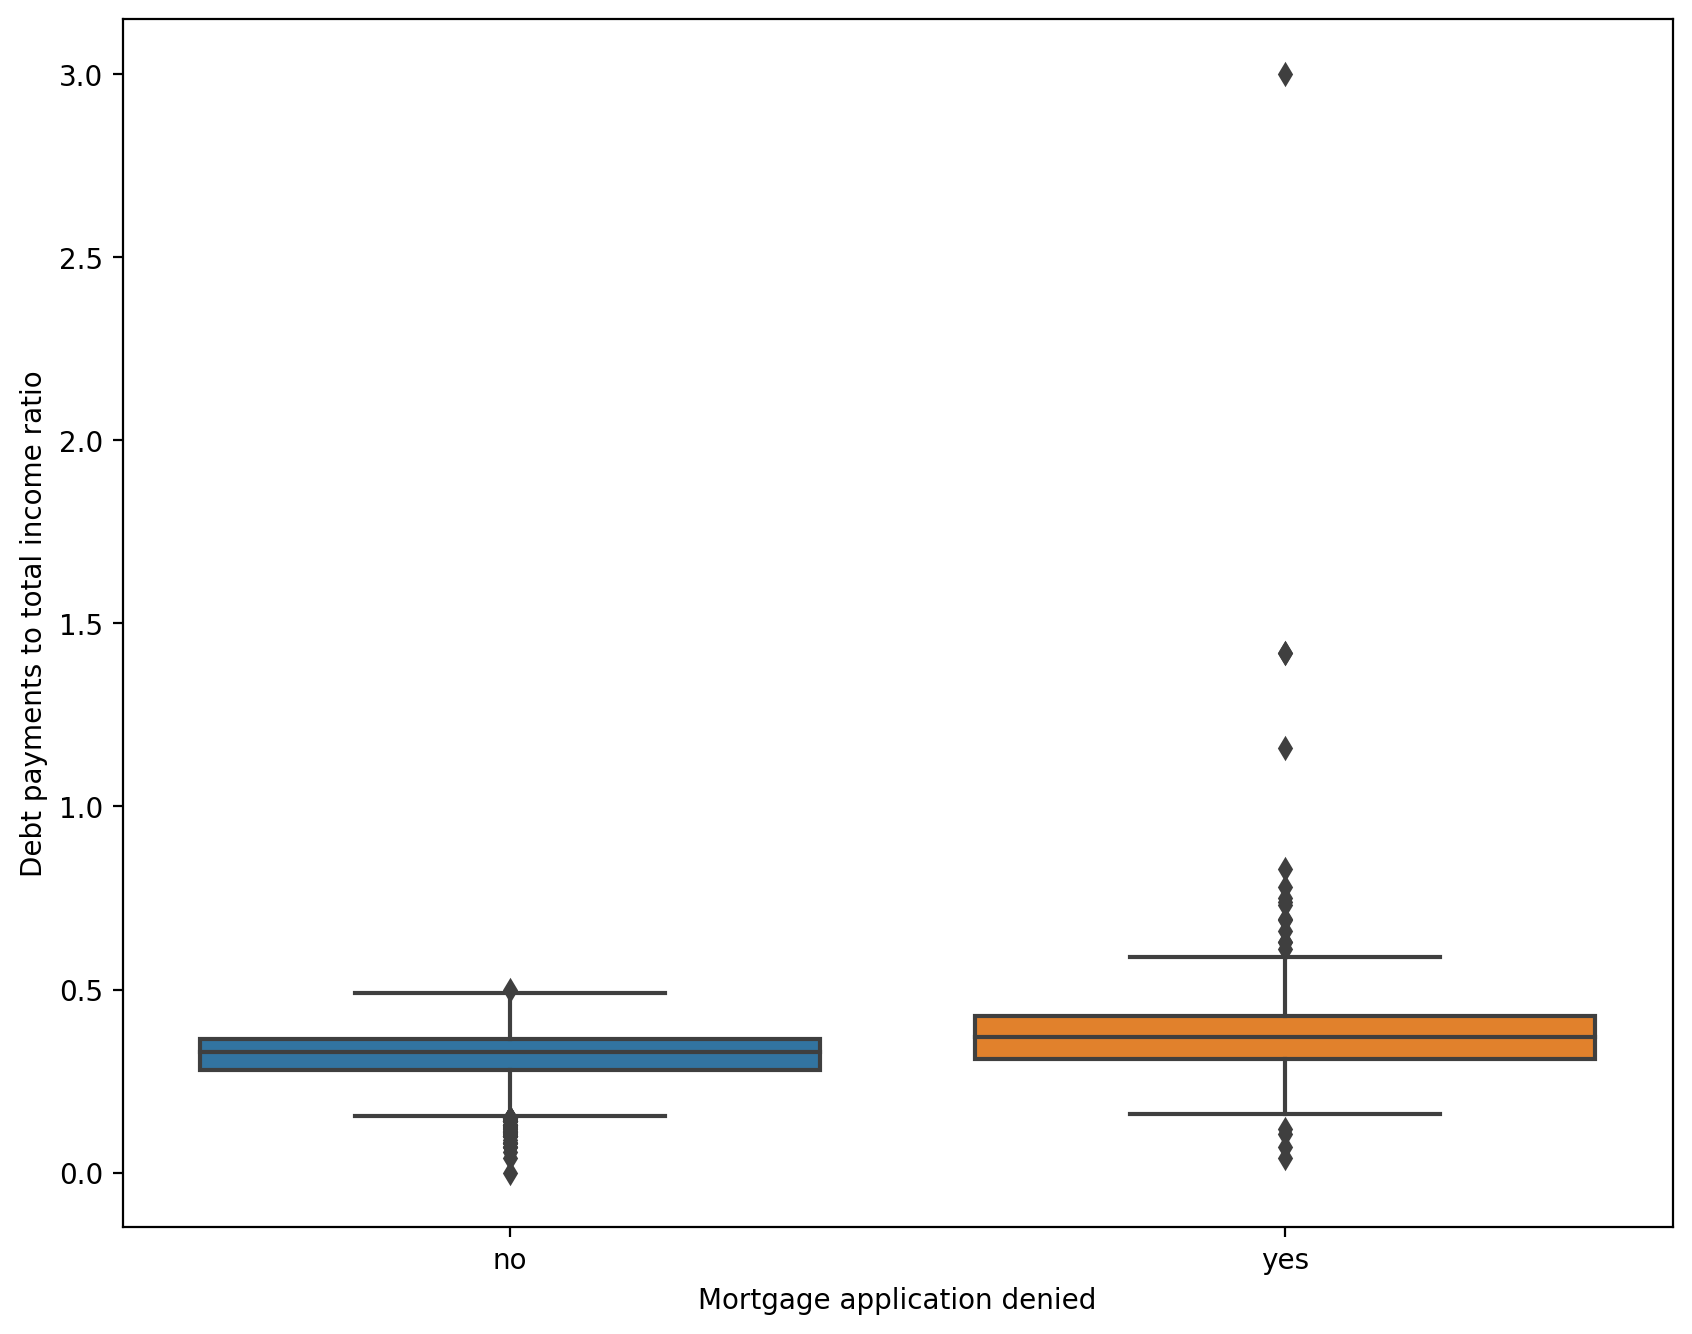

In [110]:
plt.figure(figsize=(10,8), dpi=200)
ax1 = sns.boxplot(data = df , x = 'deny' , y = 'dir')
ax1.set_xlabel('Mortgage application denied')
ax1.set_ylabel('Debt payments to total income ratio')

There are still some outliers in the graph after removing few outliers.

Text(0, 0.5, 'consumer credit score ')

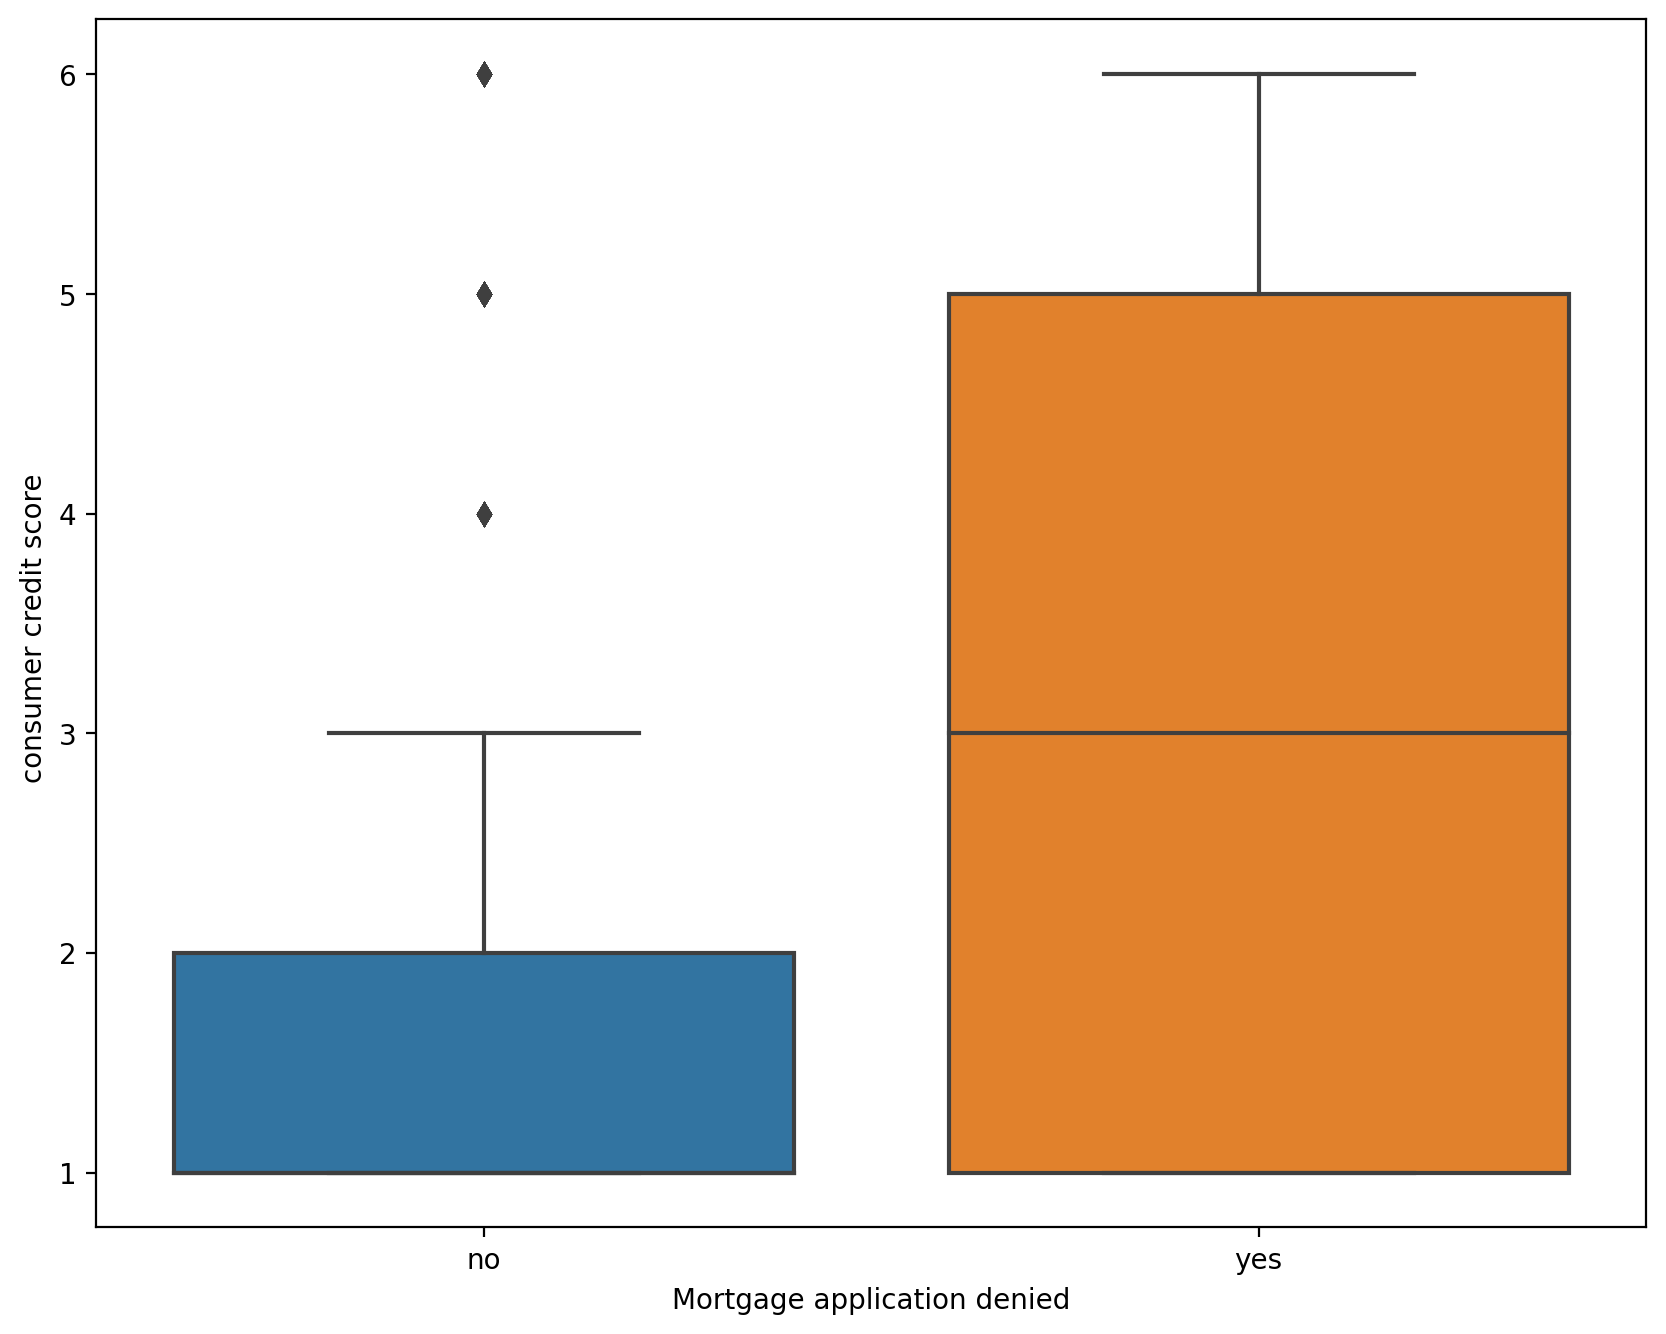

In [111]:
#The lower your credit score, the less likely your mortgage application will be approved.
plt.figure(figsize=(10,8), dpi=200)
ax1 = sns.boxplot(data = df , x = 'deny' , y = 'ccs')
ax1.set_xlabel('Mortgage application denied')
ax1.set_ylabel('consumer credit score ')

In [112]:
df[(df['deny'] =="no") & (df['ccs'] >=4)].index.values

array([   0,   31,   44,   50,   54,   67,  101,  120,  133,  136,  138,
        147,  148,  149,  154,  157,  164,  174,  182,  186,  192,  202,
        204,  206,  207,  208,  220,  224,  225,  234,  238,  242,  255,
        256,  264,  272,  273,  288,  292,  296,  324,  325,  328,  340,
        344,  359,  361,  363,  377,  378,  379,  381,  383,  384,  385,
        386,  427,  430,  432,  433,  439,  448,  449,  455,  456,  470,
        472,  474,  483,  484,  520,  531,  616,  622,  634,  642,  644,
        646,  662,  677,  681,  684,  686,  688,  689,  718,  734,  738,
        763,  769,  784,  840,  844,  850,  852,  856,  859,  868,  883,
        889,  893,  896,  920,  931,  935,  936,  947,  951,  952,  960,
        969,  979,  995,  996, 1019, 1034, 1039, 1043, 1046, 1047, 1051,
       1056, 1058, 1070, 1092, 1110, 1116, 1118, 1122, 1135, 1137, 1140,
       1142, 1145, 1146, 1147, 1148, 1151, 1152, 1155, 1156, 1181, 1200,
       1204, 1208, 1209, 1210, 1214, 1216, 1264, 12

In [113]:
df.drop([ 0,   31,   44,   50,   54,   67,  101,  120,  133,  136,  138,147,  148,  149,  154,  157,  164,  174,  182,  186,  192,  202,204,  206,  207,  208,  220,  224,  225,  234,  238,  242,  255], inplace = True)

Text(0, 0.5, 'consumer credit score ')

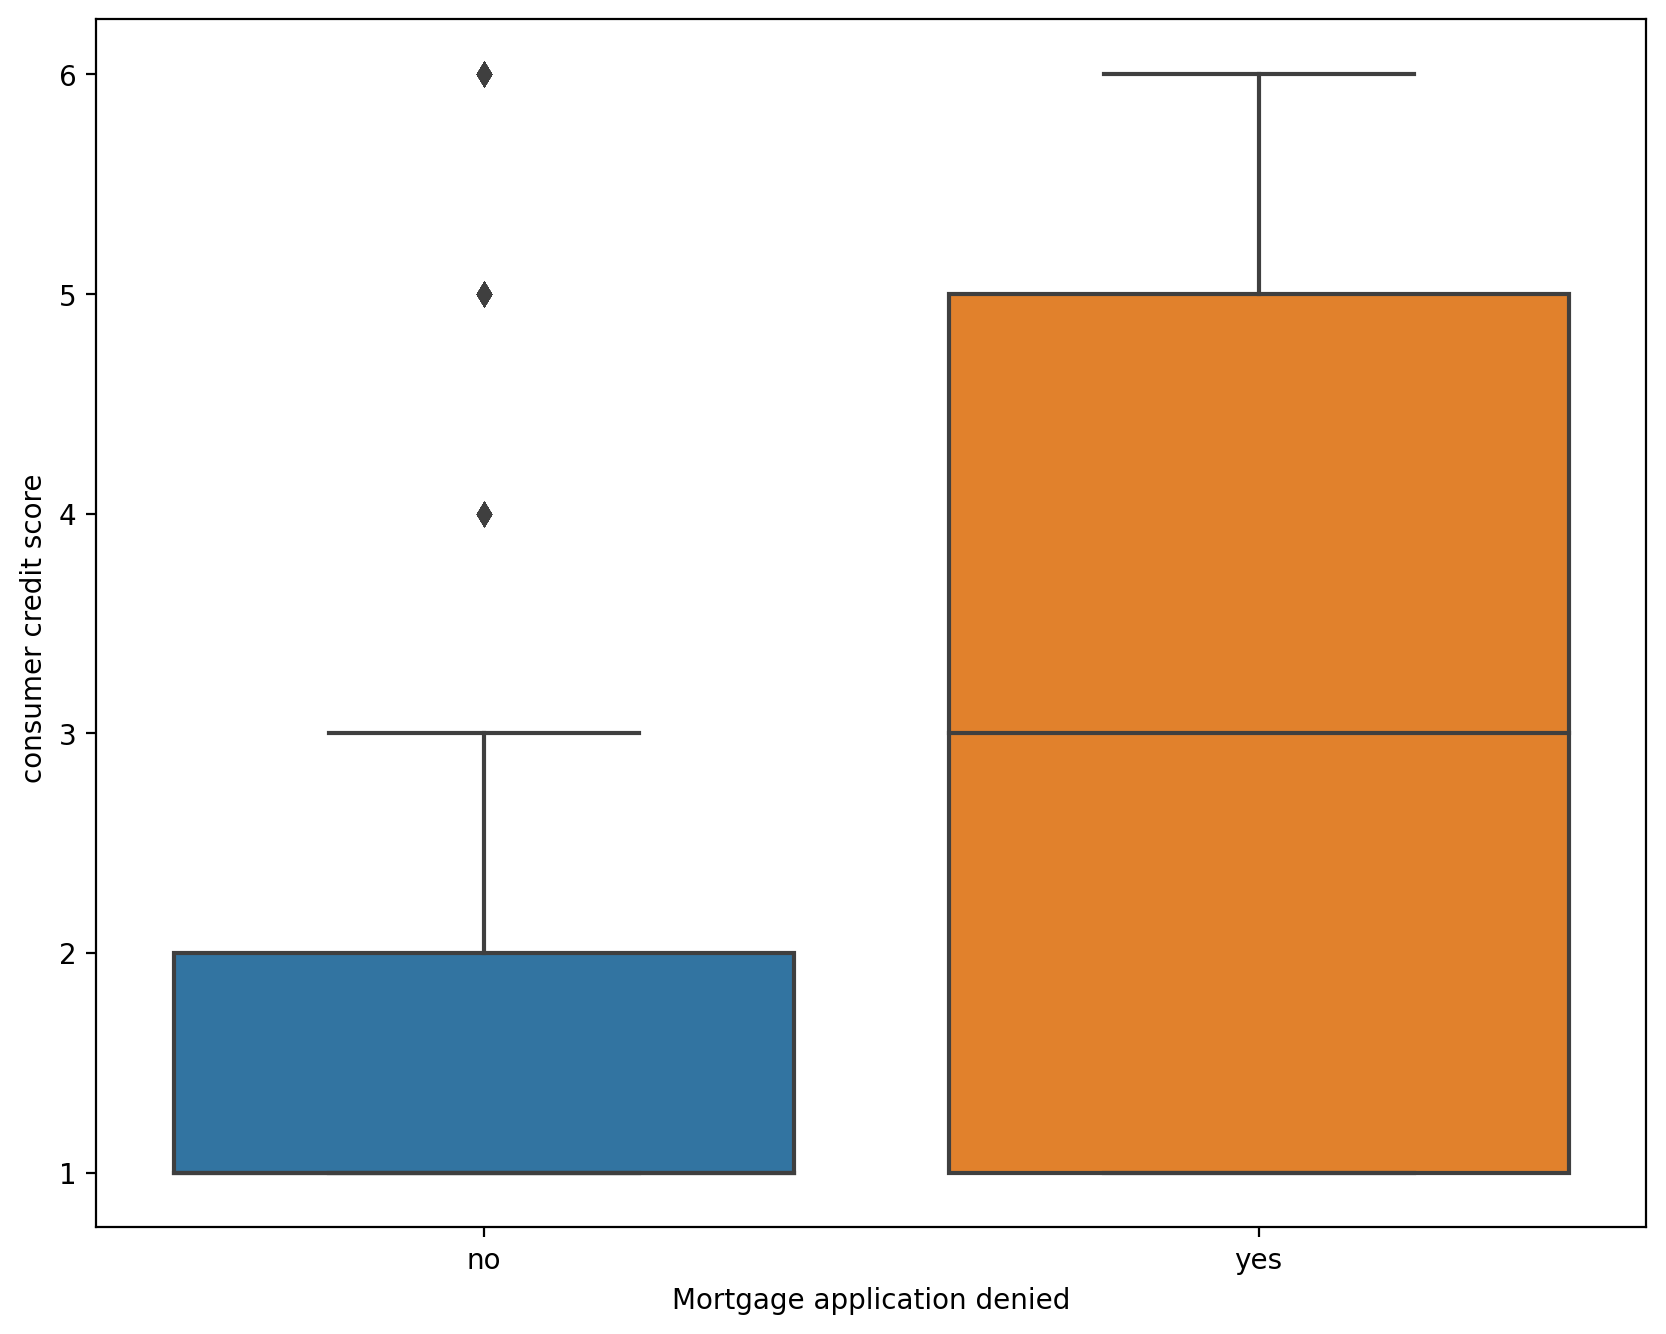

In [114]:
plt.figure(figsize=(10,8), dpi=200)
ax1 = sns.boxplot(data = df , x = 'deny' , y = 'ccs')
ax1.set_xlabel('Mortgage application denied')
ax1.set_ylabel('consumer credit score ')

There are still some outliers in the graph after removing few outliers.

In [115]:
df.describe()

,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000
mean,0.327367,0.253134,0.737914,2.062605,1.719253,3.785480,0.288010
std,0.102445,0.094909,0.178498,1.628061,0.534201,2.044706,0.452934
min,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,0.280000,0.211200,0.654420,1.000000,1.000000,3.100000,0.000000
50%,0.330000,0.260000,0.780008,1.000000,2.000000,3.200000,0.000000
75%,0.370000,0.293000,0.868421,2.000000,2.000000,3.900000,1.000000
max,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


In [116]:
df_cat = df.select_dtypes(object)

In [117]:
df_num = df.select_dtypes(["int64" , "float64"])

In [118]:
df_new = pd.concat([df_num,df_cat], axis=1)
df_new.head()

,dir,hir,lvr,ccs,mcs,uria,comdominiom,pbcr,dmi,self,single,black,deny
1,0.265,0.265,0.921875,2.0,2.0,3.2,0,no,no,no,yes,no,no
2,0.372,0.248,0.920398,1.0,2.0,3.2,0,no,no,no,no,no,no
3,0.320,0.250,0.860465,1.0,2.0,4.3,0,no,no,no,no,no,no
4,0.360,0.350,0.600000,1.0,1.0,3.2,0,no,no,no,no,no,no
5,0.240,0.170,0.510526,1.0,1.0,3.9,0,no,no,no,no,no,no


In [119]:
le = LabelEncoder()

In [120]:
df_cat

,pbcr,dmi,self,single,black,deny
1,no,no,no,yes,no,no
2,no,no,no,no,no,no
3,no,no,no,no,no,no
4,no,no,no,no,no,no
5,no,no,no,no,no,no
...,...,...,...,...,...,...
2376,no,no,no,yes,no,no
2377,no,no,no,no,no,no
2378,yes,no,no,yes,yes,yes
2379,no,no,no,yes,no,yes


In [121]:
for col in df_cat:
    le = LabelEncoder()
    df_cat["pbcr"]= le.fit_transform(df_cat["pbcr"])

In [122]:
for col in df_cat:
    le = LabelEncoder()
    df_cat["dmi"]= le.fit_transform(df_cat["dmi"])

In [123]:
for col in df_cat:
    le = LabelEncoder()
    df_cat["self"]= le.fit_transform(df_cat["self"])

In [124]:
for col in df_cat:
    le = LabelEncoder()
    df_cat["single"]= le.fit_transform(df_cat["single"])

In [125]:
for col in df_cat:
    le = LabelEncoder()
    df_cat["black"]= le.fit_transform(df_cat["black"])

In [126]:
for col in df_cat:
    le = LabelEncoder()
    df_cat["deny"]= le.fit_transform(df_cat["deny"])

In [127]:
df_cat

,pbcr,dmi,self,single,black,deny
1,0,0,0,1,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
...,...,...,...,...,...,...
2376,0,0,0,1,0,0
2377,0,0,0,0,0,0
2378,1,0,0,1,1,1
2379,0,0,0,1,0,1


In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
mx = MinMaxScaler()

In [130]:
df['ccs'] = mx.fit_transform(df['ccs'].values.reshape(-1,1))

In [131]:
df['mcs'] = mx.fit_transform(df['mcs'].values.reshape(-1,1))

In [132]:
df['uria'] = mx.fit_transform(df['uria'].values.reshape(-1,1))

In [133]:
df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
1,0.265,0.265,0.921875,0.2,0.333333,no,no,no,yes,0.159091,0,no,no
2,0.372,0.248,0.920398,0.0,0.333333,no,no,no,no,0.159091,0,no,no
3,0.320,0.250,0.860465,0.0,0.333333,no,no,no,no,0.284091,0,no,no
4,0.360,0.350,0.600000,0.0,0.000000,no,no,no,no,0.159091,0,no,no
5,0.240,0.170,0.510526,0.0,0.000000,no,no,no,no,0.238636,0,no,no


In [134]:
df.describe()

,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000,2302.000000
mean,0.327367,0.253134,0.737914,0.212521,0.239751,0.225623,0.288010
std,0.102445,0.094909,0.178498,0.325612,0.178067,0.232353,0.452934
min,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000
25%,0.280000,0.211200,0.654420,0.000000,0.000000,0.147727,0.000000
50%,0.330000,0.260000,0.780008,0.000000,0.333333,0.159091,0.000000
75%,0.370000,0.293000,0.868421,0.200000,0.333333,0.238636,1.000000
max,3.000000,3.000000,1.950000,1.000000,1.000000,1.000000,1.000000


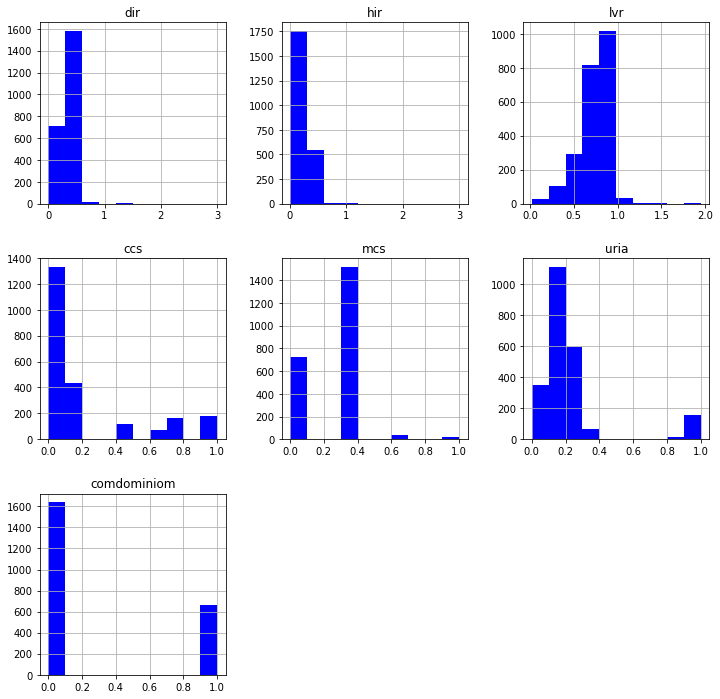

In [135]:
#Histogram of numerical data
fig = df.hist(figsize=(12,12),color ='blue')


<function matplotlib.pyplot.show(close=None, block=None)>

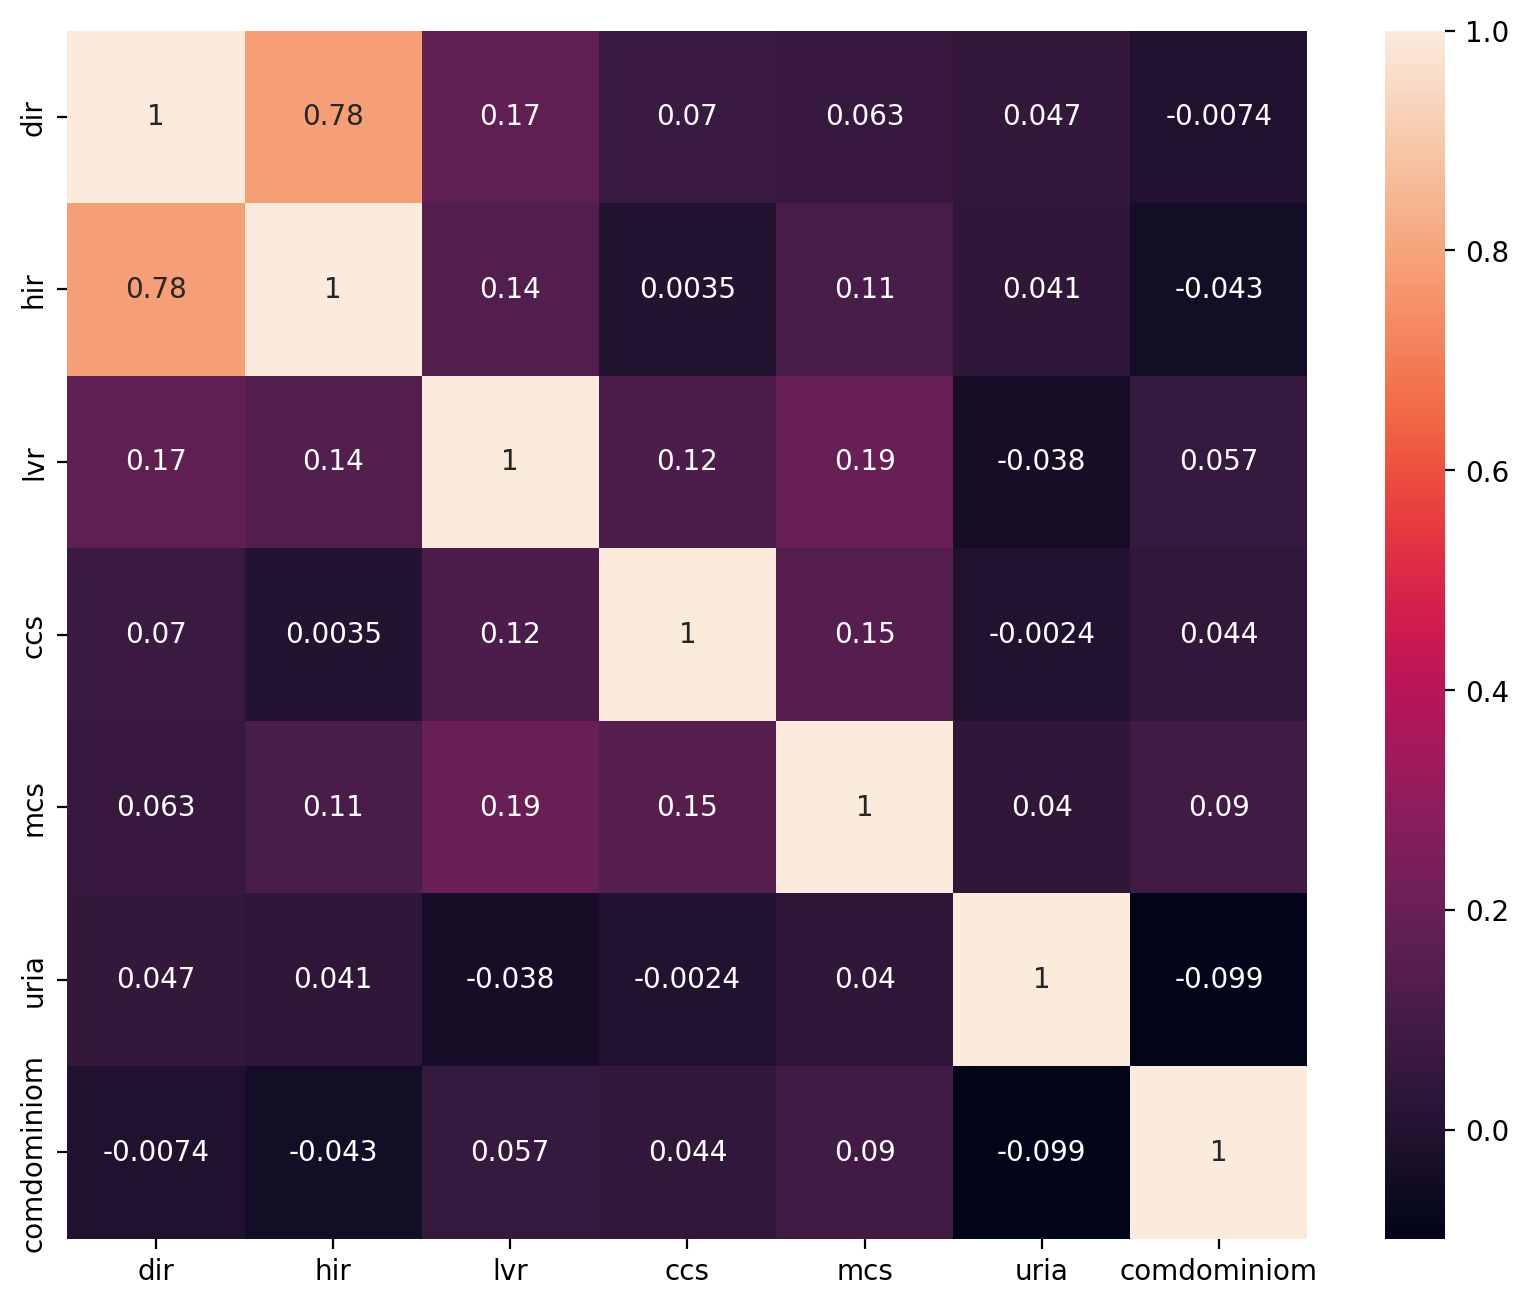

In [136]:
plt.figure(figsize=(10,8), dpi=200)
sns.heatmap(df.corr() , annot = True)
plt.show

In [137]:
df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
1,0.265,0.265,0.921875,0.2,0.333333,no,no,no,yes,0.159091,0,no,no
2,0.372,0.248,0.920398,0.0,0.333333,no,no,no,no,0.159091,0,no,no
3,0.320,0.250,0.860465,0.0,0.333333,no,no,no,no,0.284091,0,no,no
4,0.360,0.350,0.600000,0.0,0.000000,no,no,no,no,0.159091,0,no,no
5,0.240,0.170,0.510526,0.0,0.000000,no,no,no,no,0.238636,0,no,no


In [138]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

def LogisticRegression_model(Nmodel):
    print('For LogisticRegression Model:')
    x_train, x_test, y_train, y_test = train_test_split(Nmodel.drop('mcs',axis=1), 
                                                        Nmodel['mcs'], test_size=0.20, 
                                                       random_state=101)
    model = LogisticRegression()
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    print(classification_report(y_test,predictions))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R-squared:', metrics.r2_score(y_test, predictions))
    print()
    print('Accuracy Score:', accuracy_score(y_test, predictions))
    print()
    print()

def DecisionTreeClassifier_model(Nmodel):
    print('For DecisionTreeClassifier Model:')
    x_train, x_test, y_train, y_test = train_test_split(Nmodel.drop('mcs',axis=1), 
                                                        Nmodel['mcs'], test_size=0.20, 
                                                       random_state=101)
    model = DecisionTreeClassifier(max_depth=3, criterion='gini')
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(classification_report(y_test,predictions))
    print('Mean Absolute Error:', metricsmetrics.mean_absolute_error(y_test, predictions))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R-squared:', metrics.r2_score(y_test, predictions))
    print()
    print('Accuracy Score:', accuracy_score(y_test, predictions))
    print()

In [149]:


model = df.drop(['deny','pbcr'],axis=1)
LogisticRegression(model)


LogisticRegression(penalty=           dir       hir       lvr       ccs       mcs dmi self single  \
1     0.265000  0.265000  0.921875  0.200000  0.333333  no   no    yes   
2     0.372000  0.248000  0.920398  0.000000  0.333333  no   no     no   
3     0.320000  0.250000  0.860465  0.000000  0.333333  no   no     no   
4     0.360000  0.350000  0.600000  0.000000  0.000000  no   no     no   
5     0.240000  0.170000  0.510526  0.000000  0.000000  no   no     no   
...        ...       ...       ...       ...       ...  ..  ...    ...   
2376  0.300000  0.300000  0.777049  0.00...
2377  0.260000  0.200000  0.526761  0.200000  0.000000  no   no     no   
2378  0.320000  0.260000  0.753846  1.000000  0.000000  no   no    yes   
2379  0.350000  0.260000  0.813559  0.200000  0.333333  no   no    yes   
2380  0.330814  0.255346  0.700783  0.223277  0.240336  no  NaN    yes   

          uria  comdominiom black  
1     0.159091            0    no  
2     0.159091            0    no  
3     

In [150]:
model = df.drop(['dir','hir'],axis=1)
LogisticRegression(model)

LogisticRegression(penalty=           lvr       ccs       mcs pbcr dmi self single      uria  \
1     0.921875  0.200000  0.333333   no  no   no    yes  0.159091   
2     0.920398  0.000000  0.333333   no  no   no     no  0.159091   
3     0.860465  0.000000  0.333333   no  no   no     no  0.284091   
4     0.600000  0.000000  0.000000   no  no   no     no  0.159091   
5     0.510526  0.000000  0.000000   no  no   no     no  0.238636   
...        ...       ...       ...  ...  ..  ...    ...       ...   
2376  0.777049  0.000000  0.333333   no  no   no    yes  0.159091   
2377  0.526761  0.200000  0.000000   no  no   no     no  0.147727   
2378  0.753846  1.000000  0.000000  yes  no   no    yes  0.147727   
2379  0.813559  0.200000  0.333333   no  no   no    yes  0.284091   
2380  0.700783  0.223277  0.240336  NaN  no  NaN    yes  0.224375   

      comdominiom black deny  
1               0    no   no  
2               0    no   no  
3               0    no   no  
4               0   

In [151]:
model = df.drop(['lvr','ccs'],axis=1)
LogisticRegression(model)

LogisticRegression(penalty=           dir       hir       mcs pbcr dmi self single      uria  \
1     0.265000  0.265000  0.333333   no  no   no    yes  0.159091   
2     0.372000  0.248000  0.333333   no  no   no     no  0.159091   
3     0.320000  0.250000  0.333333   no  no   no     no  0.284091   
4     0.360000  0.350000  0.000000   no  no   no     no  0.159091   
5     0.240000  0.170000  0.000000   no  no   no     no  0.238636   
...        ...       ...       ...  ...  ..  ...    ...       ...   
2376  0.300000  0.300000  0.333333   no  no   no    yes  0.159091   
2377  0.260000  0.200000  0.000000   no  no   no     no  0.147727   
2378  0.320000  0.260000  0.000000  yes  no   no    yes  0.147727   
2379  0.350000  0.260000  0.333333   no  no   no    yes  0.284091   
2380  0.330814  0.255346  0.240336  NaN  no  NaN    yes  0.224375   

      comdominiom black deny  
1               0    no   no  
2               0    no   no  
3               0    no   no  
4               0   